# Imports and Constants

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Notes

In [2]:
NOTE_LETTERS = ['C', 'D', 'E', 'F', 'G', 'A', 'B']

NOTES_TO_TONES = {
    'Dbb': 0, 'C': 0, 'B#': 0, 'A###': 0,
    'Ebbb': 1, 'Db': 1, 'C#': 1, 'B##': 1,
    'Fbbb': 2, 'Ebb': 2, 'D': 2, 'C##': 2, 'B###': 2,
    'Fbb': 3, 'Eb': 3, 'D#': 3, 'C###': 3,
    'Gbbb': 4, 'Fb': 4, 'E': 4, 'D##': 4,
    'Gbb': 5, 'F': 5, 'E#': 5, 'D###': 5,
    'Abbb': 6, 'Gb': 6, 'F#': 6, 'E##': 6,
    'Abb': 7, 'G': 7, 'F##': 7, 'E###': 7,
    'Bbbb': 8, 'Ab': 8, 'G#': 8, 'F###': 8,
    'Cbbb': 9, 'Bbb': 9, 'A': 9, 'G##': 9,
    'Cbb': 10, 'Bb': 10, 'A#': 10, 'G###': 10,
    'Dbbb': 11, 'Cb': 11, 'B': 11, 'A##': 11,
}

SENSIBLE_NOTES = [
    'B#', 'C', 'C#',
    'Db', 'D', 'D#',
    'Eb', 'E', 'Fb',
    'E#', 'F', 'F#',
    'Gb', 'G', 'G#',
    'Ab', 'A', 'A#',
    'Bb', 'B', 'Cb', 
 ]

def strip_note_modifier(note):
    new_note = str(note)
    return new_note.replace('#', '').replace('b', '')

## Intervals

In [3]:
SEMITONE_DIFFERENCE_TO_ALL_INTERVALS = {
    0: ['P1', 'o2', '+7'],
    1: ['+1', 'm2', 'oo3', '++7'],
    2: ['M2', 'o3', '++1'],
    3: ['+2', 'm3', 'oo4'],
    4: ['M3', 'o4', '++2', 'ooo5'],
    5: ['+3', 'P4', 'oo5'],
    6: ['+4', 'o5', 'oo6', '++3'],
    7: ['P5', 'o6', '++4'],
    8: ['+5', 'm6', 'oo7', '+++4'],
    9: ['M6', 'o7', '++5'],
    10: ['+6', 'm7', 'oo1'],
    11: ['M7', 'o8', '++6', 'o1', '+++2'],
    12: ['+7', 'P8'],
    13: ['+8'],
}

SENSIBLE_INTERVALS = [
    'P1',
    'm2', 'M2', '+2',
    'm3', 'M3',
    'P4', '+4',
    'o5', 'P5', '+5',
    'm6', 'M6',
    'o7', 'm7', 'M7',
]

def get_interval_distance(interval):
    new_interval = str(interval)
    return int(new_interval.replace('o', '').replace('m', '').replace('M', '').replace('P', '').replace('+', ''))

In [4]:
def get_interval_matrix():
    semitone_diffs = np.empty(shape=(len(SENSIBLE_NOTES), len(SENSIBLE_NOTES)))
    intervals = [[None for _ in range(len(SENSIBLE_NOTES))] for _ in range(len(SENSIBLE_NOTES))]
    
    for i, low_note in enumerate(SENSIBLE_NOTES):
        for j, high_note in enumerate(SENSIBLE_NOTES):

            low_tone = NOTES_TO_TONES[low_note] 
            high_tone =NOTES_TO_TONES[high_note] 

            semitone_diff = high_tone - low_tone
            semitone_diff = semitone_diff if semitone_diff >= 0 else semitone_diff + 12
            semitone_diffs[i][j] = semitone_diff

            interval_distance = NOTE_LETTERS.index(strip_note_modifier(high_note)) - NOTE_LETTERS.index(strip_note_modifier(low_note)) + 1
            interval_distance = interval_distance if interval_distance >= 1 else interval_distance + 7
            interval = [interval for interval in SEMITONE_DIFFERENCE_TO_ALL_INTERVALS[semitone_diff] if str(interval_distance) in interval][0]
            intervals[i][j] = interval

    index = pd.Index(SENSIBLE_NOTES, name='Low Note')
    cols = pd.Index(SENSIBLE_NOTES, name='High Note')
    
    return pd.DataFrame(intervals, columns=cols, index=index), pd.DataFrame(semitone_diffs, columns=cols, index=index)

test_intervals, test_semitone_diffs = get_interval_matrix()
test_intervals

High Note,B#,C,C#,Db,D,D#,Eb,E,Fb,E#,F,F#,Gb,G,G#,Ab,A,A#,Bb,B,Cb
Low Note,,,,,,,,,,,,,,,,,,,,,
B#,P1,o2,m2,oo3,o3,m3,oo4,o4,ooo5,P4,oo5,o5,oo6,o6,m6,oo7,o7,m7,oo1,o1,+++2
C,+7,P1,+1,m2,M2,+2,m3,M3,o4,+3,P4,+4,o5,P5,+5,m6,M6,+6,m7,M7,o1
C#,M7,o1,P1,o2,m2,M2,o3,m3,oo4,M3,o4,P4,oo5,o5,P5,o6,m6,M6,o7,m7,oo1
Db,++6,M7,+7,P1,+1,++1,M2,+2,m3,++2,M3,+3,P4,+4,++4,P5,+5,++5,M6,+6,m7
D,+6,m7,M7,o1,P1,+1,m2,M2,o3,+2,m3,M3,o4,P4,+4,o5,P5,+5,m6,M6,o7
D#,M6,o7,m7,oo1,o1,P1,o2,m2,oo3,M2,o3,m3,oo4,o4,P4,oo5,o5,P5,o6,m6,oo7
Eb,++5,M6,+6,m7,M7,+7,P1,+1,m2,++1,M2,+2,m3,M3,+3,P4,+4,++4,P5,+5,m6
E,+5,m6,M6,o7,m7,M7,o1,P1,o2,+1,m2,M2,o3,m3,M3,o4,P4,+4,o5,P5,o6
Fb,+++4,+5,++5,M6,+6,++6,M7,+7,P1,++7,+1,++1,M2,+2,++2,M3,+3,++3,+4,++4,P5


In [12]:
test_intervals

High Note,B#,C,C#,Db,D,D#,Eb,E,Fb,E#,F,F#,Gb,G,G#,Ab,A,A#,Bb,B,Cb
Low Note,,,,,,,,,,,,,,,,,,,,,
B#,P1,o2,m2,oo3,o3,m3,oo4,o4,ooo5,P4,oo5,o5,oo6,o6,m6,oo7,o7,m7,oo1,o1,+++2
C,+7,P1,+1,m2,M2,+2,m3,M3,o4,+3,P4,+4,o5,P5,+5,m6,M6,+6,m7,M7,o1
C#,M7,o1,P1,o2,m2,M2,o3,m3,oo4,M3,o4,P4,oo5,o5,P5,o6,m6,M6,o7,m7,oo1
Db,++6,M7,+7,P1,+1,++1,M2,+2,m3,++2,M3,+3,P4,+4,++4,P5,+5,++5,M6,+6,m7
D,+6,m7,M7,o1,P1,+1,m2,M2,o3,+2,m3,M3,o4,P4,+4,o5,P5,+5,m6,M6,o7
D#,M6,o7,m7,oo1,o1,P1,o2,m2,oo3,M2,o3,m3,oo4,o4,P4,oo5,o5,P5,o6,m6,oo7
Eb,++5,M6,+6,m7,M7,+7,P1,+1,m2,++1,M2,+2,m3,M3,+3,P4,+4,++4,P5,+5,m6
E,+5,m6,M6,o7,m7,M7,o1,P1,o2,+1,m2,M2,o3,m3,M3,o4,P4,+4,o5,P5,o6
Fb,+++4,+5,++5,M6,+6,++6,M7,+7,P1,++7,+1,++1,M2,+2,++2,M3,+3,++3,+4,++4,P5


<Axes: xlabel='High Note', ylabel='Low Note'>

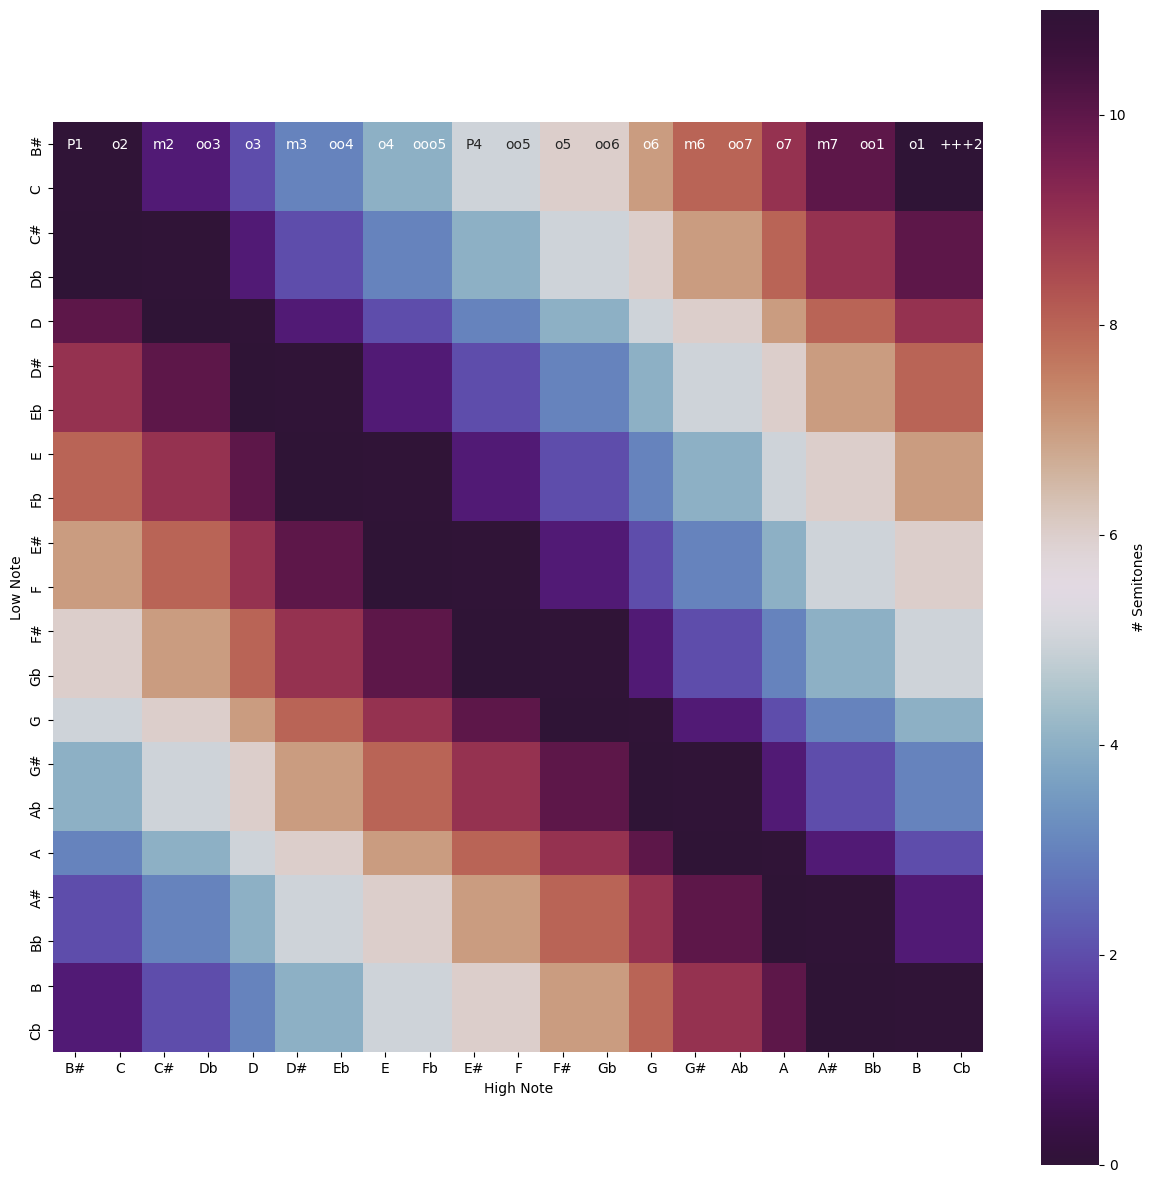

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(test_semitone_diffs, xticklabels=SENSIBLE_NOTES, yticklabels=SENSIBLE_NOTES, annot=test_intervals, fmt="", square=True, cbar_kws={'label': '# Semitones'}, cmap='twilight_shifted')
#sns.heatmap(test_semitone_diffs, xticklabels=SENSIBLE_NOTES, yticklabels=SENSIBLE_NOTES, annot=test_intervals, fmt="", square=True, cbar_kws={'label': '# Semitones'})

In [6]:
def get_interval_up(low_note, interval):
    low_note_letter = strip_note_modifier(low_note)
    low_tone = NOTES_TO_TONES[low_note]
    distance = get_interval_distance(interval)

    high_note_letter = NOTE_LETTERS[(NOTE_LETTERS.index(low_note_letter) + distance - 1) % len(NOTE_LETTERS)]

    for note_modifier in ['bbb', 'bb', 'b', '', '#', '##', '###']:
        high_note = high_note_letter + note_modifier
        high_tone = NOTES_TO_TONES[high_note]
        semitone_difference = high_tone - low_tone
        if semitone_difference < 0:
            semitone_difference += 12

        #print(low_note, low_tone, high_note, high_tone, interval, distance, semitone_difference)
        if interval in SEMITONE_DIFFERENCE_TO_ALL_INTERVALS[semitone_difference]:
            return high_note

    raise RuntimeError(f'No interval up found for low note {low_note} and interval {interval}')

def get_interval_up_matrix():
    matrix = [[get_interval_up(low_note, interval) for interval in SENSIBLE_INTERVALS] for low_note in SENSIBLE_NOTES]
    note_index = pd.Index(SENSIBLE_NOTES, name='Low Note')
    interval_columns = pd.Index(SENSIBLE_INTERVALS, name='Interval Up')
    return pd.DataFrame(matrix, index=note_index, columns=interval_columns)

get_interval_up_matrix()

Interval Up,P1,m2,M2,+2,m3,M3,P4,+4,o5,P5,+5,m6,M6,o7,m7,M7
Low Note,,,,,,,,,,,,,,,,
B#,B#,C#,C##,C###,D#,D##,E#,E##,F#,F##,F###,G#,G##,A,A#,A##
C,C,Db,D,D#,Eb,E,F,F#,Gb,G,G#,Ab,A,Bbb,Bb,B
C#,C#,D,D#,D##,E,E#,F#,F##,G,G#,G##,A,A#,Bb,B,B#
Db,Db,Ebb,Eb,E,Fb,F,Gb,G,Abb,Ab,A,Bbb,Bb,Cbb,Cb,C
D,D,Eb,E,E#,F,F#,G,G#,Ab,A,A#,Bb,B,Cb,C,C#
D#,D#,E,E#,E##,F#,F##,G#,G##,A,A#,A##,B,B#,C,C#,C##
Eb,Eb,Fb,F,F#,Gb,G,Ab,A,Bbb,Bb,B,Cb,C,Dbb,Db,D
E,E,F,F#,F##,G,G#,A,A#,Bb,B,B#,C,C#,Db,D,D#
Fb,Fb,Gbb,Gb,G,Abb,Ab,Bbb,Bb,Cbb,Cb,C,Dbb,Db,Ebbb,Ebb,Eb


In [7]:
def get_interval_down(high_note, interval):
    high_note_letter = strip_note_modifier(high_note)
    high_tone = NOTES_TO_TONES[high_note]
    distance = get_interval_distance(interval)

    low_note_letter = NOTE_LETTERS[(NOTE_LETTERS.index(high_note_letter) - distance + 1) % len(NOTE_LETTERS)]

    for note_modifier in ['bbb', 'bb', 'b', '', '#', '##', '###']:
        low_note = low_note_letter + note_modifier
        low_tone = NOTES_TO_TONES[low_note]
        semitone_difference = high_tone - low_tone
        if semitone_difference < 0:
            semitone_difference += 12

        #print(low_note, low_tone, high_note, high_tone, interval, distance, semitone_difference)
        if interval in SEMITONE_DIFFERENCE_TO_ALL_INTERVALS[semitone_difference]:
            return low_note

    raise RuntimeError(f'No interval down found for high note {high_note} and interval {interval}')

def get_interval_down_matrix():
    matrix = [[get_interval_down(high_note, interval) for interval in SENSIBLE_INTERVALS] for high_note in SENSIBLE_NOTES]
    note_index = pd.Index(SENSIBLE_NOTES, name='High Note')
    interval_columns = pd.Index(SENSIBLE_INTERVALS, name='Interval Down')
    return pd.DataFrame(matrix, index=note_index, columns=interval_columns)

get_interval_down_matrix()

Interval Down,P1,m2,M2,+2,m3,M3,P4,+4,o5,P5,+5,m6,M6,o7,m7,M7
High Note,,,,,,,,,,,,,,,,
B#,B#,A##,A#,A,G##,G#,F##,F#,E##,E#,E,D##,D#,C###,C##,C#
C,C,B,Bb,Bbb,A,Ab,G,Gb,F#,F,Fb,E,Eb,D#,D,Db
C#,C#,B#,B,Bb,A#,A,G#,G,F##,F#,F,E#,E,D##,D#,D
Db,Db,C,Cb,Cbb,Bb,Bbb,Ab,Abb,G,Gb,Gbb,F,Fb,E,Eb,Ebb
D,D,C#,C,Cb,B,Bb,A,Ab,G#,G,Gb,F#,F,E#,E,Eb
D#,D#,C##,C#,C,B#,B,A#,A,G##,G#,G,F##,F#,E##,E#,E
Eb,Eb,D,Db,Dbb,C,Cb,Bb,Bbb,A,Ab,Abb,G,Gb,F#,F,Fb
E,E,D#,D,Db,C#,C,B,Bb,A#,A,Ab,G#,G,F##,F#,F
Fb,Fb,Eb,Ebb,Ebbb,Db,Dbb,Cb,Cbb,Bb,Bbb,Bbbb,Ab,Abb,G,Gb,Gbb


## Scales

In [8]:
def major_scale(tonic):
    return [get_interval_up(tonic, interval) for interval in ['P1', 'M2', 'M3', 'P4', 'P5', 'M6', 'M7']]

def natural_minor_scale(tonic):
    return [get_interval_up(tonic, interval) for interval in ['P1', 'M2', 'm3', 'P4', 'P5', 'm6', 'm7']]

def harmonic_minor_scale(tonic):
    return [get_interval_up(tonic, interval) for interval in ['P1', 'M2', 'm3', 'P4', 'P5', 'm6', 'M7']]

def melodic_minor_scale(tonic):
    return [get_interval_up(tonic, interval) for interval in ['P1', 'M2', 'm3', 'P4', 'P5', 'M6', 'M7']]

def diminished_scale(tonic):
    return [get_interval_up(tonic, interval) for interval in ['P1', 'm2', 'm3', 'o4', 'o5', 'o6', 'o7']]

def double_harmonic_scale(tonic):
    return [get_interval_up(tonic, interval) for interval in ['P1', 'm2', 'M3', 'P4', 'P5', 'm6', 'M7']]

In [9]:
def get_mode(scale: list, mode: int):
    if mode <= 0 or mode > len(scale):
        raise ValueError(f'Cannot get the {mode} mode of a scale with {len(scale)} notes')
    return scale[mode-1:] + scale[0:mode-1]

def ionian_scale(tonic):
    return major_scale(tonic)

def dorian_scale(tonic):
    return get_mode(major_scale(get_interval_down(tonic, 'M2')), 2)

def phyrgian_scale(tonic):
    return get_mode(major_scale(get_interval_down(tonic, 'M3')), 3)

def lydian_scale(tonic):
    return get_mode(major_scale(get_interval_down(tonic, 'P4')), 4)

def mixolydian_scale(tonic):
    return get_mode(major_scale(get_interval_down(tonic, 'P5')), 5)

def aolian_scale(tonic):
    return get_mode(major_scale(get_interval_down(tonic, 'M6')), 6)

def locrian_scale(tonic):
    return get_mode(major_scale(get_interval_down(tonic, 'M7')), 7)

In [36]:
for note in SENSIBLE_NOTES:
    print(note, aolian_scale(note), natural_minor_scale(get_interval_down(note, 'm3')))

B# ['B#', 'C##', 'D#', 'E#', 'F##', 'G#', 'A#'] ['G##', 'A##', 'B#', 'C##', 'D##', 'E#', 'F##']
C ['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb'] ['A', 'B', 'C', 'D', 'E', 'F', 'G']
C# ['C#', 'D#', 'E', 'F#', 'G#', 'A', 'B'] ['A#', 'B#', 'C#', 'D#', 'E#', 'F#', 'G#']
Db ['Db', 'Eb', 'Fb', 'Gb', 'Ab', 'Bbb', 'Cb'] ['Bb', 'C', 'Db', 'Eb', 'F', 'Gb', 'Ab']
D ['D', 'E', 'F', 'G', 'A', 'Bb', 'C'] ['B', 'C#', 'D', 'E', 'F#', 'G', 'A']
D# ['D#', 'E#', 'F#', 'G#', 'A#', 'B', 'C#'] ['B#', 'C##', 'D#', 'E#', 'F##', 'G#', 'A#']
Eb ['Eb', 'F', 'Gb', 'Ab', 'Bb', 'Cb', 'Db'] ['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb']
E ['E', 'F#', 'G', 'A', 'B', 'C', 'D'] ['C#', 'D#', 'E', 'F#', 'G#', 'A', 'B']
Fb ['Fb', 'Gb', 'Abb', 'Bbb', 'Cb', 'Dbb', 'Ebb'] ['Db', 'Eb', 'Fb', 'Gb', 'Ab', 'Bbb', 'Cb']
E# ['E#', 'F##', 'G#', 'A#', 'B#', 'C#', 'D#'] ['C##', 'D##', 'E#', 'F##', 'G##', 'A#', 'B#']
F ['F', 'G', 'Ab', 'Bb', 'C', 'Db', 'Eb'] ['D', 'E', 'F', 'G', 'A', 'Bb', 'C']
F# ['F#', 'G#', 'A', 'B', 'C#', 'D', 'E'] ['D#', 'E#', '

In [ ]:
for mode in range(1,8):
    print(get_mode(major_scale('C'), mode))

print('')
print(ionian_scale('C'))
print(dorian_scale('C'))
print(phyrgian_scale('C'))
print(lydian_scale('C'))
print(mixolydian_scale('C'))
print(aolian_scale('C'))
print(locrian_scale('C'))

['C', 'D', 'E', 'F', 'G', 'A', 'B']
['D', 'E', 'F', 'G', 'A', 'B', 'C']
['E', 'F', 'G', 'A', 'B', 'C', 'D']
['F', 'G', 'A', 'B', 'C', 'D', 'E']
['G', 'A', 'B', 'C', 'D', 'E', 'F']
['A', 'B', 'C', 'D', 'E', 'F', 'G']
['B', 'C', 'D', 'E', 'F', 'G', 'A']

['C', 'D', 'E', 'F', 'G', 'A', 'B']
['C', 'D', 'Eb', 'F', 'G', 'A', 'Bb']
['C', 'Db', 'Eb', 'F', 'G', 'Ab', 'Bb']
['C', 'D', 'E', 'F#', 'G', 'A', 'B']
['C', 'D', 'E', 'F', 'G', 'A', 'Bb']
['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb']
['C', 'Db', 'Eb', 'F', 'Gb', 'Ab', 'Bb']


In [ ]:
print(major_scale('Eb'))
print(natural_minor_scale('Eb'))
print(harmonic_minor_scale('Eb'))
print(melodic_minor_scale('Eb'))
print(dorian_scale('Eb'))
print(diminished_scale('Eb'))

['Eb', 'F', 'G', 'Ab', 'Bb', 'C', 'D']
['Eb', 'F', 'Gb', 'Ab', 'Bb', 'Cb', 'Db']
['Eb', 'F', 'Gb', 'Ab', 'Bb', 'Cb', 'D']
['Eb', 'F', 'Gb', 'Ab', 'Bb', 'C', 'D']
['Eb', 'F', 'Gb', 'Ab', 'Bb', 'C', 'Db']
['Eb', 'Fb', 'Gb', 'Abb', 'Bbb', 'Cbb', 'Dbb']


In [ ]:
set(natural_minor_scale('Eb')) | set(harmonic_minor_scale('Eb')) | set(melodic_minor_scale('Eb'))

{'Ab', 'Bb', 'C', 'Cb', 'D', 'Db', 'Eb', 'F', 'Gb'}

## Chords

In [ ]:
# theres an imperfect map from a collection of tones to a collection of notes to a chord name

def get_chord_notes(tones: list(int)) -> list(str):
    pass

def is_traid(notes: list(str)) -> bool:
    pass

def get_triad_type(triad: list(str)) -> :
    pass

def get_triad_name():
    pass

TypeError: 'type' object is not iterable

In [ ]:
""" 
list(int) -> list(str)
list(str) -> list(int)

list(int) -> str
str -> list(int)

list(str) -> str
str -> list(str)

Root position semitone differences
Diminished triads:
(3, )
"""